In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import os
from tqdm import tqdm
from pylab import *

In [2]:

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 15
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.KMNIST(root='../../data',      
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.KMNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)



0it [00:00, ?it/s]

18169856it [00:08, 2174174.14it/s]                              


Extracting ../../data/KMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 51029.28it/s]                            
0it [00:00, ?it/s]

Extracting ../../data/KMNIST/raw/train-labels-idx1-ubyte.gz


3047424it [00:02, 1191448.29it/s]                             
0it [00:00, ?it/s]

Extracting ../../data/KMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 16824.73it/s]            

Extracting ../../data/KMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [3]:
print(device)

cuda


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.fc2(out)
        return out
    
model=NeuralNet(input_size,hidden_size,num_classes).to(device)

#loss and optimiser
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)        

In [4]:

class Kuzushiji(nn.Module):
    def __init__(self):
        super(Kuzushiji, self).__init__()
        self.pad1 = nn.ZeroPad2d((2, 2))
        
        self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(7, 7), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=32),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
        )
    
        
        self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5, 5), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=64),
        nn.ReLU()
        )
        
        self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(1, 1), bias=False), 
        nn.BatchNorm2d(num_features=128),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.ReLU()
        )
        
        self.fc1 = nn.Sequential(
        nn.Linear(in_features=768, out_features=512),
        nn.ReLU()
        )
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Sequential(
        nn.Linear(in_features=512, out_features=10),
        nn.Softmax()
        )
        
    def forward(self, x):
        x = self.pad1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.reshape(x.shape[0], -1)
       # print(x.shape)
        x = self.fc1(x)
        x = self.dropout1(x)
        out = self.fc2(x)
        
        return out,x

In [5]:
my_model=Kuzushiji().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(my_model.parameters(),lr=learning_rate)

In [6]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 1, 28,28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = my_model(images)[0]
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch [1/15], Step [100/600], Loss: 1.5834
Epoch [1/15], Step [200/600], Loss: 1.6239
Epoch [1/15], Step [300/600], Loss: 1.5410
Epoch [1/15], Step [400/600], Loss: 1.5461
Epoch [1/15], Step [500/600], Loss: 1.4817
Epoch [1/15], Step [600/600], Loss: 1.5728
Epoch [2/15], Step [100/600], Loss: 1.5398
Epoch [2/15], Step [200/600], Loss: 1.4964
Epoch [2/15], Step [300/600], Loss: 1.5125
Epoch [2/15], Step [400/600], Loss: 1.5221
Epoch [2/15], Step [500/600], Loss: 1.4863
Epoch [2/15], Step [600/600], Loss: 1.4723
Epoch [3/15], Step [100/600], Loss: 1.5254
Epoch [3/15], Step [200/600], Loss: 1.5156
Epoch [3/15], Step [300/600], Loss: 1.4916
Epoch [3/15], Step [400/600], Loss: 1.4741
Epoch [3/15], Step [500/600], Loss: 1.4915
Epoch [3/15], Step [600/600], Loss: 1.4841
Epoch [4/15], Step [100/600], Loss: 1.4870
Epoch [4/15], Step [200/600], Loss: 1.4839
Epoch [4/15], Step [300/600], Loss: 1.4929
Epoch [4/15], Step [400/600], Loss: 1.4893
Epoch [4/15], Step [500/600], Loss: 1.4903
Epoch [4/15

In [9]:
# Normal Model Testing
with torch.no_grad():
    correct=0
    total=0
    for images,labels in test_loader:
        images=images.reshape(-1,1,28,28).to(device)
        labels=labels.to(device)
        outputs=my_model(images)[0]
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
        
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the 10000 test images: 93.96 %


# FGSM Analysis

In [7]:
for param in my_model.parameters():
    param.requires_grad=False

# Targeted FGSM attack 

In [8]:
#targeted fgsm 

#epsilon=[0.0001,0.0003,0.001,0.003,0.1,0.2,0.3,0.4,0.5]
pred_list=[]
epsilon=[0.3]

for value in epsilon:
    pred_val_list=[]
    for k in range(2,3):
        l_tfgsm=[]
        sign=[]
        #actual=[]
        for i,(images,labels) in enumerate(test_loader):
            copyOf_images=images.clone().detach()
            copyOf_images=copyOf_images.reshape(-1,1,28,28).to(device)
            copyOf_images.requires_grad=True
            target_class=(labels+k)%10  #missing classifying it with 10 classes though it has to be correct at least once
            target_class=target_class.to(device)

            #forward pass
            outputs=my_model(copyOf_images)[0]
            loss=criterion(outputs,target_class)

            #backward and optimize
            optimizer.zero_grad()
            loss.backward()
            c=copyOf_images.grad.sign()
            #actual.append((images,labels))
            copyOf_images=copyOf_images-(value*c) 
            copyOf_images=torch.clamp(copyOf_images,0,1)
            sign.append(c)
            l_tfgsm.append((copyOf_images,images,labels))

        with torch.no_grad():
            correct=0
            total=0
            for images,trueimages,labels in l_tfgsm:
                images=images.reshape(-1,1,28,28).to(device)
                labels=labels.to(device)
                outputs=my_model(images)[0]
                _,predicted=torch.max(outputs.data,1)
                total+=labels.size(0)
                correct+=(predicted==labels).sum().item()
            pred_val_list.append(100*correct/total)
            print("accuracy of the network on the 10000 test images for epsilon value {}:{} %".format(value,100*correct/total)) 
    pred_list.append(pred_val_list)

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


accuracy of the network on the 10000 test images for epsilon value 0.3:78.53 %


In [ ]:
print(pred_list)

import matplotlib.pyplot as plt

make_list=[]
epsilon=[0.0001,0.0003,0.001,0.003,0.1,0.2,0.3,0.4,0.5]

for k in pred_list:
    make_list.append(k[2])
plt.plot(epsilon,make_list)
plt.xlabel("Epsilon Value")
plt.ylabel("Accuracy(in %)")
plt.title("Targeted FGSM on Kuzushiji where Target labels =(True label+2)%10")
plt.show()

In [ ]:
# Untargeted FGSM attack 
l=[]
sign=[]
actual=[]
epsilon=[0.0001,0.0003,0.001,0.003,0.1,0.2,0.3,0.4,0.5]

for value in epsilon:
   # for k in range(10):
        l=[]
        sign=[]
        #actual=[]
        for i,(images,labels) in enumerate(test_loader):
            copyOf_images=images.clone().detach()
            copyOf_images=copyOf_images.reshape(-1,1,28,28).to(device)
            copyOf_images.requires_grad=True
            #target_class=(labels+k)%10  #missing classifying it with 10 classes though it has to be correct at least once
            target_class=labels
            target_class=target_class.to(device)
            
            #forward pass
            outputs=my_model(copyOf_images)
            loss=criterion(outputs,target_class)

            #backward and optimize
            optimizer.zero_grad()
            loss.backward()
            c=copyOf_images.grad.sign()
            #actual.append((images,labels))
            copyOf_images=copyOf_images+(value*c) 
            copyOf_images=torch.clamp(copyOf_images,0,1)
            sign.append(c)
            l.append((copyOf_images,labels))

        with torch.no_grad():
            correct=0
            total=0
            for images,labels in l:
                images=images.reshape(-1,1,28,28).to(device)
                labels=labels.to(device)
                outputs=my_model(images)
                _,predicted=torch.max(outputs.data,1)
                total+=labels.size(0)
                correct+=(predicted==labels).sum().item()
            print("accuracy of the network on the 10000 test images for epsilon value {}:{} %".format(value,100*correct/total)) 

In [ ]:
#checking the accuracy after FGSM attack

with torch.no_grad():
    correct=0
    total=0
    for images,labels in l:
        images=images.reshape(-1,1,28,28).to(device)
        labels=labels.to(device)
        outputs=my_model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    print("accuracy of the network on the 10000 test images:{} %".format(100*correct/total))

In [57]:
def to_var(x, requires_grad=False, volatile=False):
    """
    Varialbe type that automatically choose cpu or cuda
    """
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, requires_grad=requires_grad, volatile=volatile)

In [58]:
#PGD Attack 

class LinfPGDAttack(nn.Module):
    
    def __init__(self,model=None,epsilon=0.3,k=40,a=0.01,random_start=True):
        super(LinfPGDAttack, self).__init__()
        self.model=model
        self.epsilon=epsilon
        self.k=k
        self.a=a
        self.randn=random_start
        self.loss_fn=nn.CrossEntropyLoss() 
    
    def perturb(self,X_nat,y):
        
        if self.randn:
            X=X_nat+np.random.uniform(-self.epsilon,self.epsilon,X_nat.shape).astype('float32')
        else:
            X=np.copy(X_nat)
        
        for i in range(self.k):
            X_var=to_var(torch.from_numpy(X),requires_grad=True)
            y_var=to_var(torch.LongTensor(y))
            
            scores=self.model(X_var)[0]
            loss=self.loss_fn(scores,y_var)
            loss.backward()
            grad=X_var.grad.data.cpu().numpy()
            
            X-=self.a*np.sign(grad)
            
            X=np.clip(X,X_nat-self.epsilon,X_nat+self.epsilon)
            X=np.clip(X,0,1)
        
        return X

In [68]:
from torch.autograd import Variable

l_pgd=[]
#perturbed_images=[]
#epsilon=[0.001,0.003,0.01,0.03,0.1,0.2,0.3,0.4,0.5]
tmp_list=[]
epsilon=[0.4]
for value in epsilon:
    for i,(images,labels) in enumerate(test_loader):       
        PGDobj=LinfPGDAttack(model=my_model,random_start=False,epsilon=value)
        target=(labels+3)%10  #generating the target
        Changed_Images=PGDobj.perturb(images.numpy(),target.numpy())
        if np.array_equal(Changed_Images,images.numpy()):
            print("No change")
            break        
        l_pgd.append((torch.from_numpy(Changed_Images),images,labels))
        if(i%50==0):
            print("Now adding changed images in {}th iteration".format(i))

    with torch.no_grad():
        correct=0
        total=0
        for images,trueimage,labels in l_pgd:
            images=images.reshape(-1,1,28,28).to(device)
            labels=labels.to(device)
            outputs=my_model(images)[0]
            _,predicted=torch.max(outputs.data,1)
            total+=labels.size(0)
            correct+=(predicted==labels).sum().item()
        tmp_list.append(100*correct/total)
        print("accuracy of the network on the 10000 test images:{} %".format(100*correct/total))

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Now adding changed images in 0th iteration
Now adding changed images in 50th iteration
accuracy of the network on the 10000 test images:88.86 %


In [ ]:
from torch.autograd import Variable

l=[]
#perturbed_images=[]
a=[0.001,0.003,0.01,0.03,0.1,0.2,0.3,0.4,0.5]
tmp_list=[]

for value in epsilon:
    for i,(images,labels) in enumerate(test_loader):       
        PGDobj=LinfPGDAttack(model=my_model,random_start=False,a=value)
        target=(labels+1)%10  #generating the target
        Changed_Images=PGDobj.perturb(images.numpy(),target.numpy())
        if np.array_equal(Changed_Images,images.numpy()):
            print("No change")
            break        
        l.append((torch.from_numpy(Changed_Images),labels))
        if(i%50==0):
            print("Now adding changed images in {}th iteration".format(i))

    with torch.no_grad():
        correct=0
        total=0
        for images,labels in l:
            images=images.reshape(-1,1,28,28).to(device)
            labels=labels.to(device)
            outputs=my_model(images)
            _,predicted=torch.max(outputs.data,1)
            total+=labels.size(0)
            correct+=(predicted==labels).sum().item()
        tmp_list.append(100*correct/total)
        print("accuracy of the network on the 10000 test images:{} %".format(100*correct/total))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(a,tmp_list)
plt.title("Targeted PGD over Kuzushiji")
plt.ylabel("Accuracy")
plt.xlabel("Value of One Step of Gradient Descent")

In [ ]:
#checking the accuracy after FGSM attack
with torch.no_grad():
    correct=0
    total=0
    for images,labels in l:
        images=images.reshape(-1,1,28,28).to(device)
        labels=labels.to(device)
        outputs=my_model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    
    print("accuracy of the network on the 10000 test images:{} %".format(100*correct/total))

# Carlini Wagner Attack

In [48]:
# CW-L2 Attack
# Based on the paper, i.e. not exact same version of the code on https://github.com/carlini/nn_robust_attacks
# (1) Binary search method for c, (2) Optimization on tanh space, (3) Choosing method best l2 adversaries is NOT IN THIS CODE.
def cw_l2_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, max_iter=200, learning_rate=0.01) :

    images = images.to(device)     
    labels = labels.to(device)

    # Define f-function
    def f(x) :

        outputs = model(x)[1]  #taking penultimate layer in this case rather than the softmax layer
        one_hot_labels = torch.eye(len(outputs[0]))[labels].to(device)

        i, _ = torch.max((1-one_hot_labels)*outputs, dim=1)
        j = torch.masked_select(outputs, one_hot_labels.byte())
        
        # If targeted, optimize for making the other class most likely 
        if targeted :
            return torch.clamp(i-j, min=-kappa)
        
        # If untargeted, optimize for making the other class most likely 
        else :
            return torch.clamp(j-i, min=-kappa)
    
    w = torch.zeros_like(images, requires_grad=True).to(device)

    optimizer = torch.optim.Adam([w], lr=learning_rate)

    prev = 1e10
    
    for step in tqdm(range(max_iter)) :

        a = 1/2*(nn.Tanh()(w) + 1)

        loss1 = nn.MSELoss(reduction='sum')(a, images)
        loss2 = torch.sum(c*f(a))

        cost = loss1 + loss2

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        # Early Stop when loss does not converge.
        if step % (max_iter//10) == 0 :
            if cost > prev :
                print('Attack Stopped due to CONVERGENCE....')
                return a
            prev = cost
        
        print('- Learning Progress : %2.2f %%        ' %((step+1)/max_iter*100), end='\r')

    attack_images = 1/2*(nn.Tanh()(w) + 1)

    return attack_images

In [49]:
print("Attack Image & Predicted Label")

#kappa=[0.01,0.03,1,3,5,7,9]
#options=[0.01,0.03,0.1,0.2,0.3,0.4,0.5]
options=[0.5]
tmp_list=[]
l=[]
for value in options:
    correct = 0
    total = 0
    for i,(images, labels) in enumerate(test_loader):
        if (i<20):
            #target=(labels+2)%10 
            images_ = cw_l2_attack(my_model, images, labels, targeted=True,c=value,kappa=5)
            #images = cw_l2_attack(my_model, images, target, c=0.1)
            labels = labels.to(device)
            outputs = my_model(images_)[0]
            
            _, pre = torch.max(outputs.data, 1)
            l.append((images_,images,labels))
            total+=labels.size(0)
            correct += (pre == labels).sum().item()

            #imshow(torchvision.utils.make_grid(images.cpu().data, normalize=True), [normal_data.classes[i] for i in pre])
    tmp_list.append(100*float(correct)/total)
    print('Accuracy of test text: %f %%' % (100 * float(correct) / total))

  0%|          | 0/200 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
 12%|█▏        | 23/200 [00:00<00:00, 220.97it/s]

Attack Image & Predicted Label


 36%|███▌      | 71/200 [00:00<00:00, 225.42it/s]

 59%|█████▉    | 118/200 [00:00<00:00, 226.02it/s]

 83%|████████▎ | 166/200 [00:00<00:00, 230.30it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 236.38it/s]

 48%|████▊     | 96/200 [00:00<00:00, 234.45it/s]

 72%|███████▏  | 143/200 [00:00<00:00, 232.26it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▎       | 47/200 [00:00<00:00, 233.06it/s]

 48%|████▊     | 95/200 [00:00<00:00, 235.52it/s]

 72%|███████▏  | 143/200 [00:00<00:00, 234.84it/s]

 96%|█████████▌| 191/200 [00:00<00:00, 234.56it/s]

 12%|█▎        | 25/200 [00:00<00:00, 240.11it/s]

 36%|███▋      | 73/200 [00:00<00:00, 237.57it/s]

 60%|██████    | 120/200 [00:00<00:00, 235.13it/s]

 84%|████████▍ | 168/200 [00:00<00:00, 235.64it/s]

 12%|█▏        | 24/200 [00:00<00:00, 238.74it/s]

 36%|███▌      | 72/200 [00:00<00:00, 238.01it/s]

 60%|██████    | 120/200 [00:00<00:00, 235.90it/s]

 84%|████████▍ | 168/200 [00:00<00:00, 235.73it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 235.78it/s]

 48%|████▊     | 96/200 [00:00<00:00, 235.21it/s]

 72%|███████▏  | 144/200 [00:00<00:00, 233.68it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 234.47it/s]

 48%|████▊     | 96/200 [00:00<00:00, 234.96it/s]

 72%|███████▏  | 144/200 [00:00<00:00, 235.31it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 235.52it/s]

 48%|████▊     | 96/200 [00:00<00:00, 236.21it/s]

 72%|███████▏  | 144/200 [00:00<00:00, 236.68it/s]

 96%|█████████▌| 192/200 [00:00<00:00, 235.04it/s]

 12%|█▏        | 24/200 [00:00<00:00, 239.51it/s]

 36%|███▌      | 72/200 [00:00<00:00, 237.62it/s]

 60%|██████    | 120/200 [00:00<00:00, 236.90it/s]

 84%|████████▍ | 168/200 [00:00<00:00, 237.18it/s]

 12%|█▏        | 24/200 [00:00<00:00, 230.47it/s]

 34%|███▍      | 69/200 [00:00<00:00, 226.82it/s]

 58%|█████▊    | 117/200 [00:00<00:00, 230.89it/s]

 82%|████████▎ | 165/200 [00:00<00:00, 233.03it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 235.83it/s]

- Learning Progress : 30.50 %        

 48%|████▊     | 95/200 [00:00<00:00, 233.50it/s]

 70%|███████   | 140/200 [00:00<00:00, 225.82it/s]

100%|██████████| 200/200 [00:00<00:00, 230.81it/s]


 24%|██▍       | 48/200 [00:00<00:00, 236.94it/s]

 48%|████▊     | 96/200 [00:00<00:00, 234.86it/s]

 72%|███████▏  | 144/200 [00:00<00:00, 234.86it/s]

 96%|█████████▌| 191/200 [00:00<00:00, 232.33it/s]

 12%|█▏        | 23/200 [00:00<00:00, 225.41it/s]

 36%|███▌      | 71/200 [00:00<00:00, 229.91it/s]

 59%|█████▉    | 118/200 [00:00<00:00, 230.07it/s]

 83%|████████▎ | 166/200 [00:00<00:00, 232.42it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▎       | 47/200 [00:00<00:00, 232.55it/s]

 48%|████▊     | 95/200 [00:00<00:00, 234.54it/s]

 72%|███████▏  | 143/200 [00:00<00:00, 234.36it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 234.99it/s]

 48%|████▊     | 96/200 [00:00<00:00, 234.63it/s]

 72%|███████▏  | 144/200 [00:00<00:00, 235.10it/s]

100%|██████████| 200/200 [00:00<00:00, 232.97it/s]


 24%|██▍       | 48/200 [00:00<00:00, 236.61it/s]

 48%|████▊     | 96/200 [00:00<00:00, 236.25it/s]

 72%|███████▏  | 144/200 [00:00<00:00, 235.89it/s]

 96%|█████████▌| 192/200 [00:00<00:00, 235.00it/s]

 12%|█▏        | 24/200 [00:00<00:00, 235.36it/s]

 36%|███▌      | 72/200 [00:00<00:00, 235.91it/s]

 60%|█████▉    | 119/200 [00:00<00:00, 234.32it/s]

 84%|████████▎ | 167/200 [00:00<00:00, 234.39it/s]

 12%|█▏        | 23/200 [00:00<00:00, 227.40it/s]

 35%|███▌      | 70/200 [00:00<00:00, 230.53it/s]

 59%|█████▉    | 118/200 [00:00<00:00, 233.07it/s]

 83%|████████▎ | 166/200 [00:00<00:00, 234.64it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 236.30it/s]

 48%|████▊     | 95/200 [00:00<00:00, 234.75it/s]

 71%|███████   | 142/200 [00:00<00:00, 233.11it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 24%|██▍       | 48/200 [00:00<00:00, 237.71it/s]

 48%|████▊     | 96/200 [00:00<00:00, 235.84it/s]

 72%|███████▏  | 144/200 [00:00<00:00, 235.49it/s]

 96%|█████████▌| 192/200 [00:00<00:00, 234.77it/s]

100%|██████████| 200/200 [00:00<00:00, 234.50it/s]


Accuracy of test text: 73.300000 %    


In [ ]:
np.asarray(l).shape

In [ ]:
print(tmp_list)

import matplotlib.pyplot as plt
plt.title("Targeted L2 Carlini Wagner Attack on Kuzushiji")
plt.xlabel("Different k values keeping c=0.3,learning_rate=0.01,num_iters=200")
plt.ylabel("Accuracy")
plt.plot(kappa_list,tmp_list)

In [ ]:
tmp_list

In [ ]:
tmp_list

import matplotlib.pyplot as plt
plt.title("Targeted L2 Carlini Wagner Attack on Kuzushiji")
plt.xlabel("Different c values keeping k=5,learning_rate=0.01,num_iters=200")
plt.ylabel("Accuracy")
plt.plot(options,tmp_list)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image

In [26]:

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create a directory if not exists
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# Hyper-parameters
image_size = 784
h_dim = 400
z_dim = 60
num_epochs = 20
batch_size = 64
learning_rate = 2e-3

# MNIST dataset
dataset = torchvision.datasets.KMNIST(root='../../data',
                                     train=True,
                                     transform=transforms.ToTensor(),
                                     download=True)

# Data loader
data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)


# VAE model
class VAE(nn.Module):
    def __init__(self, image_size=784, h_dim=400, z_dim=60):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(image_size, 500)
        self.fc2 = nn.Linear(500, 300)
        self.fc3 = nn.Linear(300, 150)
        self.fc4 = nn.Linear(150, z_dim)
        self.fc41 = nn.Linear(150, z_dim)
        self.fc5 = nn.Linear(z_dim, 150)
        self.fc6 = nn.Linear(150, 300)
        self.fc7 = nn.Linear(300, 500)
        self.fc8 = nn.Linear(500, image_size)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        h = F.relu(self.fc3(h))
        return self.fc4(h), self.fc41(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc5(z))
        h = F.relu(self.fc6(h))
        h = F.relu(self.fc7(h))
        return F.sigmoid(self.fc8(h))
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Start training
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(data_loader):
        # Forward pass
        x = x.to(device).view(-1, image_size)
        x_reconst, mu, log_var = model(x)
        
        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backprop and optimize
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}, TOTAL : {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item(), kl_div.item()+reconst_loss.item()))


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch[1/20], Step [200/938], Reconst Loss: 20012.3164, KL Div: 483.3965, TOTAL : 20495.7129
Epoch[1/20], Step [400/938], Reconst Loss: 19332.6699, KL Div: 469.8812, TOTAL : 19802.5511
Epoch[1/20], Step [600/938], Reconst Loss: 17345.7734, KL Div: 507.4565, TOTAL : 17853.2300
Epoch[1/20], Step [800/938], Reconst Loss: 17462.6562, KL Div: 489.5184, TOTAL : 17952.1747
Epoch[2/20], Step [200/938], Reconst Loss: 15186.6865, KL Div: 554.5348, TOTAL : 15741.2213
Epoch[2/20], Step [400/938], Reconst Loss: 15716.6895, KL Div: 591.3491, TOTAL : 16308.0386
Epoch[2/20], Step [600/938], Reconst Loss: 16666.0762, KL Div: 614.4821, TOTAL : 17280.5582
Epoch[2/20], Step [800/938], Reconst Loss: 16519.1113, KL Div: 559.4547, TOTAL : 17078.5660
Epoch[3/20], Step [200/938], Reconst Loss: 14638.8096, KL Div: 618.8929, TOTAL : 15257.7025
Epoch[3/20], Step [400/938], Reconst Loss: 15602.7217, KL Div: 589.5343, TOTAL : 16192.2560
Epoch[3/20], Step [600/938], Reconst Loss: 14520.1592, KL Div: 628.1704, TOTAL :

In [28]:
# Start training
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(data_loader):
        # Forward pass
        x = x.to(device).view(-1, image_size)
        x_reconst, mu, log_var = model(x)
        
        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backprop and optimize
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}, TOTAL : {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item(), kl_div.item()+reconst_loss.item()))


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch[1/20], Step [200/938], Reconst Loss: 13397.7920, KL Div: 788.1029, TOTAL : 14185.8949
Epoch[1/20], Step [400/938], Reconst Loss: 13240.7705, KL Div: 797.4417, TOTAL : 14038.2122
Epoch[1/20], Step [600/938], Reconst Loss: 14041.8320, KL Div: 784.4711, TOTAL : 14826.3031
Epoch[1/20], Step [800/938], Reconst Loss: 13132.9678, KL Div: 777.5554, TOTAL : 13910.5231
Epoch[2/20], Step [200/938], Reconst Loss: 14766.9189, KL Div: 805.9244, TOTAL : 15572.8434
Epoch[2/20], Step [400/938], Reconst Loss: 14761.4062, KL Div: 776.2466, TOTAL : 15537.6529
Epoch[2/20], Step [600/938], Reconst Loss: 13482.3477, KL Div: 761.0208, TOTAL : 14243.3685
Epoch[2/20], Step [800/938], Reconst Loss: 15245.2344, KL Div: 814.9751, TOTAL : 16060.2095
Epoch[3/20], Step [200/938], Reconst Loss: 12743.2148, KL Div: 801.1198, TOTAL : 13544.3347
Epoch[3/20], Step [400/938], Reconst Loss: 13348.1191, KL Div: 833.8094, TOTAL : 14181.9286
Epoch[3/20], Step [600/938], Reconst Loss: 13659.7676, KL Div: 820.6782, TOTAL :

In [ ]:
l[0][0].shape

# Result for Defense on CW Attack using VAE

In [ ]:
with torch.no_grad():
    
    correct=0
    total=0
    for attacked,trueimages,labels in l:
        
        attacked=trueimages.reshape(-1,1,28,28).to(device)
        labels=labels.to(device)
        
        vae_input = attacked.view(-1, image_size)
        attacked_reconstructed, mu, log_var = model(vae_input)
        attacked_reconstructed=attacked_reconstructed.view(-1,1,28,28)
        outputs=my_model(attacked_reconstructed)[0]
        
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
        print('Accuracy of the network on the attacked images so far: {} %'.format(100 * correct / total))
        
    print('Final Accuracy of the network on the attacked images: {} %'.format(100 * correct / total))
    

# Result for Defense against Targeted FGSM Attack using VAE

In [27]:
with torch.no_grad():
    
    correct=0
    total=0
    for attacked,trueimages,labels in l_tfgsm:
        
        attacked=trueimages.reshape(-1,1,28,28).to(device)
        labels=labels.to(device)
        
        vae_input = attacked.view(-1, image_size)
        attacked_reconstructed, mu, log_var = model(vae_input)
        attacked_reconstructed=attacked_reconstructed.view(-1,1,28,28)
        outputs=my_model(attacked_reconstructed)[0]
        
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
        print('Accuracy of the network on the attacked images so far: {} %'.format(100 * correct / total))
        
    print('Final Accuracy of the network on the attacked images: {} %'.format(100 * correct / total))
    

Accuracy of the network on the attacked images so far: 78.0 %
Accuracy of the network on the attacked images so far: 76.0 %
Accuracy of the network on the attacked images so far: 74.33333333333333 %
Accuracy of the network on the attacked images so far: 72.75 %
Accuracy of the network on the attacked images so far: 72.2 %
Accuracy of the network on the attacked images so far: 72.5 %
Accuracy of the network on the attacked images so far: 72.42857142857143 %
Accuracy of the network on the attacked images so far: 71.375 %
Accuracy of the network on the attacked images so far: 71.22222222222223 %
Accuracy of the network on the attacked images so far: 71.0 %
Accuracy of the network on the attacked images so far: 71.0909090909091 %
Accuracy of the network on the attacked images so far: 71.16666666666667 %
Accuracy of the network on the attacked images so far: 71.23076923076923 %
Accuracy of the network on the attacked images so far: 71.21428571428571 %
Accuracy of the network on the attacked

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


# Defense VAE using KNN methodology

In [ ]:
print(device)

In [53]:
# l contains values for the CW attack
# l_tgsm contains the value for the tfgsm attack

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

N=4000 #generating N random images from Z space

with torch.no_grad():
        # Save the sampled images
    z = torch.randn(N, z_dim).to(device)
    out = model.decode(z)  #generation of N images
    #print(out.shape)
    output= out.view(-1,1,28,28)
    
samples=out.cpu().numpy()
#print(numpy_out.shape)
neigh=NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=1, p=2, radius=1.0)

In [69]:
correct=0
total=0

for attacked,trueimages,labels in l_pgd:
    #implementing the K-NN on the attacked
    #print(attacked.shape)
    #print(trueimages.shape)
    #print(labels.shape)
    
    labels=labels.to(device)
    temp=attacked.view(-1,image_size).detach()
    numpy_attacked=temp.cpu().numpy()
    result=neigh.kneighbors(numpy_attacked)
    #result[1] is a numpy array containing the index of the closest image in the sample space
    
    index=list(result[1].flatten())
    #print(index)
    
    ClosestImage=out[index,:]
    input_to_classifier=ClosestImage.reshape(-1,1,28,28).to(device)
    #print(input_to_classifier.shape)
    output=my_model(input_to_classifier)[0]
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
    print('Accuracy of the network on the attacked images so far: {} %'.format(100 * correct / total))
        
print('Final Accuracy of the network on the attacked images: {} %'.format(100 * correct / total))

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 14.0 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 10.5 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 10.0 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.75 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 10.4 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 10.166666666666666 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.428571428571429 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 10.0 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.444444444444445 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.8 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.818181818181818 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.75 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.846153846153847 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.428571428571429 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.266666666666667 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.1875 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.176470588235293 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.38888888888889 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.368421052631579 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.65 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.571428571428571 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.409090909090908 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.304347826086957 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.416666666666666 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.56 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.461538461538462 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.407407407407407 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.5 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.482758620689655 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.433333333333334 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.548387096774194 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.5625 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.575757575757576 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.558823529411764 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.485714285714286 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.472222222222221 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.513513513513514 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.578947368421053 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.820512820512821 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.875 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 10.0 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.976190476190476 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.976744186046512 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.931818181818182 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.933333333333334 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.869565217391305 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.787234042553191 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.75 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.795918367346939 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.7 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.72549019607843 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.653846153846153 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.660377358490566 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.648148148148149 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.636363636363637 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.660714285714286 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.666666666666666 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.689655172413794 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.728813559322035 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.733333333333333 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.737704918032787 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.693548387096774 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.65079365079365 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.59375 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.538461538461538 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.590909090909092 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.552238805970148 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.544117647058824 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.507246376811594 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.442857142857143 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.535211267605634 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.541666666666666 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.561643835616438 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.608108108108109 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.68 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.657894736842104 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.662337662337663 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.64102564102564 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.594936708860759 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.5875 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.580246913580247 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.609756097560975 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.626506024096386 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.607142857142858 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.6 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.616279069767442 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.620689655172415 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.613636363636363 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.617977528089888 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.6 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.615384615384615 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.619565217391305 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.602150537634408 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.606382978723405 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.589473684210526 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.59375 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.628865979381443 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.642857142857142 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the attacked images so far: 9.626262626262626 %
Accuracy of the network on the attacked images so far: 10.44 %
Final Accuracy of the network on the attacked images: 10.44 %


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
print(device)

# VAE Testing

In [ ]:
with torch.no_grad():
    # Save the sampled images
    z = torch.randn(batch_size, z_dim).to(device)
    out = model.decode(z).view(-1, 1, 28, 28)

torch.Size([64, 1, 28, 28])
(64, 28, 28)


/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


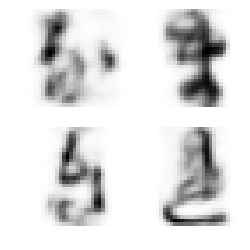

In [42]:
with torch.no_grad():
    # Save the sampled images
    z = torch.randn(batch_size, z_dim).to(device)
    out = model.decode(z).view(-1, 1, 28, 28)
    
print(out.shape)
out = out.reshape(-1, 28,28).cpu().numpy()
print(out.shape)
import matplotlib.pyplot as plt
from pylab import * 
rangee = 3
for k in range(1, rangee):
    subplot(2, rangee, k)
    plt.axis('off')
    imshow(out[k], cmap='Greys')
    subplot(2, rangee, k+rangee)
    imshow(out[k+rangee], cmap='Greys')
    plt.axis('off')   

In [ ]:
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(data_loader):
        # Forward pass
        x = x.to(device).view(-1, image_size)
        x_reconst, mu, log_var = model(x)
        
        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backprop and optimize
        loss = reconst_loss + 0.8*kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}, TOTAL : {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item(), kl_div.item()+reconst_loss.item()))


# Following are just snippet tests,they don't mean anything as such


In [ ]:
im,_=l[0]
im=im.data.cpu().numpy()

In [ ]:
old_im,_=actual[0]
old_im=old_im.data.cpu().numpy()

In [ ]:
im=im.reshape(100,28,28)
old_im=old_im.reshape(100,28,28)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(old_im[2])

In [ ]:
plt.imshow(im[2])

In [ ]:
#these ae just snippet tests they don't mean anything now
subplot(1,2,1)
title('adversarial example')
imshow(im[2],cmap='gray')
subplot(1,2,2)
title('actual sample')
imshow(old_im[2],cmap='gray')

In [ ]:
image1=torch.from_numpy(im[1])
img_t1=image1.reshape(-1,1,28,28).to(device)
outputs=my_model(img_t1)
_,predicted=torch.max(outputs.data,1)
print(predicted)

image2=torch.from_numpy(old_im[1])
img_t2=image2.reshape(-1,1,28,28).to(device)
outputs=my_model(img_t2)
_,predicted=torch.max(outputs.data,1)
print(predicted)

**Training a GAN **




In [ ]:
g_input_size=10
g_hidden_size=5
g_output_size=

d_input_size=
d_hidden_size=10
d_output_size=1
minibatch_size=d_input_size 

generator_activation_function=torch.tanh
discriminator_activation_function=torch.sigmoid

In [ ]:
def get_generator_input_sampler():
    return lambda n: torch.Tensor(np.random.normal(0,1,(g_input_size,1)))  #whatever is the size of the random input noise here 50*1

In [ ]:
class Generator(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,f):
        super(Generator,self).__init__()
        self.map1=nn.Linear(input_size,hidden_size)
        self.map2=nn.Linear(hidden_size,hidden_size)
        self.map3=nn.Linear(hidden_size,output_size)
        self.f=f
    def forward(self,x):
        x=self.map1(x)
        x=self.f(x)
        x=self.map2(x)
        x=self.f(x)
        x=self.map3(x)
        return x

In [ ]:
def Discriminator(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,f):
        super(Discriminator,self).__init__()
        self.map1=nn.Linear(input_size,hidden_size)
        self.map2=nn.Linear(hidden_size,hidden_size)
        self.map3=nn.Linear(hidden_size,output_size)
        self.f=f
    def forward(self,x):
        x=self.f(self.map1(x))
        x=self.f(self.map2(x))
        x=self.f(self.map3(x))
        return x

In [ ]:
G=Generator(input_size=g_input_size,
           hidden_size=g_hidden_size,
           output_size=g_output_size,
           f=generator_activation_function)

D=Discriminator(input_size=d_input_size,
           hidden_size=d_hidden_size,
           output_size=d_output_size,
           f=discriminator_activation_function)


In [ ]:
Number_epochs=50
D_steps=5

for epoch in range(Number_epochs):
    for d_index in range(D_steps):
        #train D on real+fake
        D
        